# Kinematics for deuteron electrodisintegration

This notebook is based on the Mathematica notebook `kinematics_for_deuteron_electrodisintegration.ipynb` from July, 2017, written by Dick Furnstahl.  **(Note: LaTeX macros are defined in this cell.)**
$$
\newcommand{\omegacm}{\omega_{\rm cm}}
\newcommand{\omegalab}{\omega_{\rm lab}}
\newcommand{\qcm}{{\bf q}_{\rm cm}}
\newcommand{\qlab}{{\bf q}_{\rm lab}}
\newcommand{\xd}{x_d}
\newcommand{\Md}{M_d}
\newcommand{\Mnp}{M_{np}}
\newcommand{\Enp}{E_{np}}
\newcommand{\pvec}{{\bf p}}
\newcommand{\pprime}{\pvec'}
\newcommand{\pplab}{\pvec_{p}}
\newcommand{\pnlab}{\pvec_{n}}
\newcommand{\Eplab}{E_{p,{\rm lab}}}
\newcommand{\Enlab}{E_{n,{\rm lab}}}
\newcommand{\qvec}{{\bf q}}
\newcommand{\pmiss}{\pvec_m}
\newcommand{\Edcm}{E_{d,{\rm cm}}}
\newcommand{\Edlab}{\Md}
\newcommand{\Pd}{P_d}
\newcommand{\Lraspace}{\quad\Longrightarrow\quad}
$$

## Overview and summary points

### Abstract and revision history

In this notebook we explore the kinematics of deuteron electrodisintegration experiments.  There are various choices of independent variables and two different reference frames, so we have introduced functions to convert between them.  Where possible, the results are checked with alternative formulas.  We also verify that the expected quasi-free ridge conditions are obtained and that physical constraints satisfied (e.g., $Q^2>0$, $0 \leq \xd \leq 2$, $\omega_{\rm lab}$).

Last revised:  31-Dec-2019 by Dick Furnstahl (furnstahl.1@osu.edu)

To do:
* Reconcile missing mass expressions.

### Kinematics in the SRC (and other) literature

* In *Modern studies of the deuteron: from the lab frame to the light front* by Boeglin and Sargsian, arXiv:1501.05377.  Quantities are given, presumably in the lab frame:  final four-momenta of the proton and neutron are

$$
   p^\mu_p = (E_p, \pplab)  \qquad  p^\mu_n = (E_n, \pnlab)
$$

and missing momentum 

$$
     \pmiss = \qlab - \pplab = \pnlab
$$

The claim is that $|\pmiss| > 300\,\mbox{MeV}/c$ is needed to probe the high-momentum NN component of the deuteron, together with

$$
  |\pplab| \sim |\qlab| \sim \mbox{few GeV}/c 
  \quad \mbox{and} \quad
  |\pnlab| = |\qlab - \pplab| = |\pmiss| \sim \mbox{few hundred MeV}/c
  \quad \mbox{and} \quad
  Q^2 > 1\,\mbox{GeV}^2 \;.
$$

* In *Large $Q^2$ electrodisintegration of the deuteron in the virtual nucleon approximation* by Misak Sargsian (SRG_electron_scattering/deuteron_electrodisintegration/papers/PhysRevC.82.014612_Sargasian.pdf) there is a discussion of the kinematics "which we consider most efficient in probing the pn system at small separations."  The conditions listed are <br> 
&nbsp;    i) $Q^2>= 1\,\mbox{GeV}^2$;  <br>
&nbsp;    ii) ${\bf p}_f \approx {\bf q}$; <br>
&nbsp;    iii) $p_f \gg p_r \geq 300\,\mbox{MeV}/c$. <br>
Here $p_f$ is the four-momentum of the struck proton and $p_r$ is the four-momentum of the recoil neutron.  The frame is not specified, but it must be the lab frame.  So these seem consistent with the numbers given in arXiv:1501.05377, with $p_f \rightarrow |\pvec_p|$ and $p_r \rightarrow |\pvec_n|$.
    * How do these conditions translate to the CoM frame?  \[Side note: the Delta is said to be important at higher $Q^2$.\]  The condition on $Q^2$ is the same, of course, as it is a Lorentz invariant.  We'll have to implement the Lorentz boost to check the others quantitatively.  
    * Assuming a one-body current and neglecting FSI, to get  $p_r\geq  300\,\mbox{MeV}/c$ for the spectator nucleon in the lab frame, the initial relative momentum must be this order, meaning greater than $1.5\,\mbox{fm}^{-1}$.  This is consistent with originating as a SRC.


* In *Experimental Study of Exclusive $^2\mbox{H}(e,e'p)n$ Reaction Mechanisms at High $Q^2$*, Egiyan et al. report on experiments with $1.75 < Q^2 < 5.5\,\mbox{GeV}^2$.  So "high $Q^2$" would seem to start at least by $Q^2 = 1.8\,\mbox{GeV}^2$.


* From Nadia Fomin talk at MIT in December, 2016 entitled *Inclusive + Semi-Inclusive Scattering Experiment*, plateaus for nuclear ratios of inclusive scattering seem to need $x > 1.5$ and $Q^2> 1.4\, \mbox{GeV}^2$.  These conditions also show up in Or Hen's thesis.  I think it is a consensus among the JLab experimentalists.

* In *Comparing proton momentum distributions in $A=2$ and $3$ nuclei via $^2$H, $^3$H, and $^3$He $(e,e'p)$ measurements* by the JLab Hall A Tritium Collaboration in PLB **797**, 134890 (2019), says they are studying the nucleon momentum distributions using Quasi-Elastic (QE) electron scattering.  Interestingly, they say: "Constraining the short-ranged part of the nuclear interaction requires studying nucleon momentum distributions at high-momentum.  However, previous attempts to extract these were largely unsuccessful, due to the fact that nucleon momentum distributions are not direct observables, and typical experimental extractions suffer from large reaction mechanism effects.  These introduce significant model-dependent corrections that mask the underlying characteristics of the momentum distribution, especially at high-momentum." Then the claim is that nuclear reaction theory is advanced to identify observables with increased sensitivity to nucleon momentum densities at high momentum.
<br><br>
The kinematics of $\omegalab$ and $\qlab$ are "appropriate" for elastic scattering from a moving bound nucleon.  What does this translate into?  I think that the final proton is on-shell after absorbing this four-momentum.
<br><br>
They  say they constrain the angle between $\pvec_{\rm recoil} = -\pmiss$ and $\qvec$ to be $\theta_{rq}\leq 40^\circ$.  (Note that they seem to use the opposite sign for the missing momentum.) Deuterium measurements are in the region $40 \leq |\pmiss| \leq 300\,\mbox{MeV}/c$, so these don't seem to be in the region required by theorists!  They have four-momentum transfer $Q^2 = 2.0\, (\mbox{GeV}/c)^2$ and $x_B = 1.4$ and energy transfer $\omega = 0.78\,\mbox{GeV}$. The knocked out protons were at $(\theta_p, p_p) = (48.82^\circ, 1.481\,\mbox{GeV/c})$ and $(58.50^\circ, 1.246\,\mbox{GeV/c})$.


* I suspect that the theorists in all cases want significantly higher $Q^2$ than $1.4\,\mbox{GeV}^2$, but this is also motivation for new JLab experiments. :)

## Python imports

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Masses and constants

In [2]:
hbarc = 197.326             # in MeV-fm for conversions
Mp = 938.272; Mn = 939.565  # proton and neutron masses in MeV
M_np = (Mp + Mn)/2           # average nucleon mass in MeV --> about 939 MeV
Bd = 2.224  # binding energy of deuteron in MeV
Md = Mp + Mn - Bd  # rest mass of deuteron in MeV

## Bjorken x


We define Bjorken $x_A$ for an $A$-body nuclear target as
$$
  x_A = \frac{Q^2}{2q\cdot P_A} A \;,
  \Lraspace 
  x_p = \frac{Q^2}{2q\cdot P_p} \quad\mbox{and}\quad \xd = \frac{Q^2}{2q\cdot \Pd} \;,
$$

where $q^\mu$ is the virtual photon four-momentum, $Q^2 = -q^2$, and $P_A$ is the four-momentum of the target nucleus.  The initial total invariant mass squared must be great than or equal to the target mass squared, with equality in the case of elastic scattering (in which case the final invariant mass squared is $M_A^2$).  So 

$$(P_A + q)^2 \geq M_A^2 \;,$$ 

which gives 

$$2q\cdot P_A \geq Q^2\;, \quad \mbox{or} \quad x_A \leq A \;.$$ 

Thus for a proton target, $0 \leq x_p \leq 1$, while for a deuteron target, $0 \leq x_d \leq 2$.

## Center of mass kinematics

The basic picture in the CoM frame is that before the photon is absorbed, its four-momentum is $(\omegacm, \qcm)$ while the deuteron has four-momentum 

$$ (\Pd)_{\rm cm} = (\Edcm, -\qcm) \quad\mbox{with}\quad \Edcm = (\Md^2 + \qcm^2)^{1/2}$$ 

because the total three-momentum is zero and the deuteron is on-shell.  

* Note that $\omegacm$ can be positive or negative: it is $\omegalab > 0$ that is required because the scattered electron loses energy in the lab frame; after boosting, $\omegacm < 0$ is possible.  

* The final state is (on-shell) neutron and proton only; the proton four-momentum is $(\Mnp + \Enp/2, \pprime)$ while the neutron four-momentum is $(\Mnp + \Enp/2, -\pprime)$, where we use the average nucleon mass everywhere. 

* We use $E' \equiv \Enp$ in the scale-dependence paper for the total final energy in the cm frame. 


Conservation of energy says 

$$
 \omegacm + (\Md^2 + \qcm^2)^{1/2} = 2 \Mnp + \Enp  \;,
$$

where $\Enp$ is the total neutron-proton final energy, which is related to the final relative momentum $\pprime$ by the on-shell condition.

$$
 (\Mnp + \Enp/2)^2 - \pprime^2 = \Mnp^2 \;.
$$

Solving these for $\omegacm$ and $\pprime$ expresses them as functions of $\Enp$ and $\qcm^2$, which we take as our basic variables:

$$  \begin{align*}
  \omegacm &= 2 \Mnp + \Enp - (\Md^2 + \qcm^2)^{1/2} \\
  \pprime^2 &= (\Mnp + \Enp/2)^2 - \Mnp^2 = \Mnp \Enp + \Enp^2/4 
\end{align*} $$

* $Q^2 = \qcm^2 - \omegacm^2$ follows directly. 
* Note that the scattering angle $\theta'$ between the direction of $\pprime$ and $\qcm$ does not play a role in these relations but we will need it for the missing mass. Come back to this below.

Be careful of the units in what follows, as we have some quantities in MeV and some in $\mbox{fm}^-1$.

In [3]:
def omega_cm(E_np, qcm_sq):
    """
    Center-of-mass virtual photon energy in MeV.  Note the conversion of 
     qcm^2 to MeV.
    """
    return E_np + 2 * M_np - np.sqrt(Md**2 + qcm_sq * hbarc**2)

def qcm(qcm_sq):
    """Convert qcm^2 to qcm, in fm^{-1}."""
    return np.sqrt(qcm_sq)

def Qsq_cm(E_np, qcm_sq):
    """
    Qsq from com frame variables, in GeV^2.
    """
    return ( qcm_sq * hbarc**2 - omega_cm(E_np, qcm_sq)**2 ) / 1000**2

def qcm_sq_MeV(qcm_sq):
    """
    Explicit function for qcd^2 in MeV^2
    """
    return qcm_sq * hbarc**2
    
def p_prime(E_np):
    """ 
    Final magnitude of nucleon momentum p' in CM frame in fm^{-1}
    """
    return np.sqrt(M_np * E_np + E_np**2 / 4) / hbarc

def p_prime_nonrel(E_np):
    """
    nonrelativistic calculation of p' in CM frame in fm^{-1}
    """
    return np.sqrt(M_np * E_np) / hbarc
    
def E_prime(p_prime):
    """
    E_np in MeV from p' in fm^{-1}
    """
    return 2 * np.sqrt(M_np**2 + (p_prime * hbarc)**2) - 2*M_np 

def Ed_cm(qcm_sq):
    """
    deuteron energy in CM frame in MeV
    """
    return np.sqrt(Md**2 + qcm_sq_MeV(qcm_sq))

### Converting between lab and cm kinematics

One way to proceed is to perform an explicit Lorentz boost. Boosting from cm frame to lab frame is easy using the deuteron to express $\beta$ and $\gamma$ because its transformation is simple: at rest in lab frame, on-shell and moving in $-\hat z$ direction with 3-momentum magnitude $|\qcm|$ in cm frame, so its energy is $\Edcm = \sqrt{\Md^2 + \qcm^2}$ and ${\bf P}_{d,{\rm cm}} = -|\qcm|\hat z$.  This means $\gamma = \Edcm/\Md$ and $|\beta| = |\qcm|/\Edcm$.  For a generic four-momentum $P^\mu = (E, {\bf P})$, the transformations are: 

$$ \begin{align*}
  E_{\rm lab} &= \frac{\Edcm}{\Md} E_{\rm cm} + \frac{|\qcm|}{\Md} P_{z,{\rm cm}} \;, \\
  P_{z, {\rm lab}} &= \frac{\Edcm}{\Md} P_{z, {\rm cm}} + \frac{|\qcm|}{\Md} E_{\rm cm} \;, \\
  P_{x, {\rm lab}} &= P_{x, {\rm cm}} \;,\\
  P_{y, {\rm lab}} &= P_{y, {\rm cm}} 
\end{align*} $$

In terms of lab quantities, we can take $|\beta| = |\qlab|/(\Md + \omegalab)$ and $\gamma = 1/\sqrt{1-\beta^2}$.



An alternative is to equate Lorentz invariants in the two frames together with four-momentum conservation in each frame individually.

$$
  (q\cdot\Pd)_{\rm cm} = (q\cdot\Pd)_{\rm lab}
  \Longrightarrow
  \omegacm \Edcm + \qcm^2 = \omegalab \Md
$$ 

or

$$
  \omegalab = \frac{1}{\Md}(\omegacm \Edcm + \qcm^2) 
             = \frac{\Edcm}{\Md}\left(\omegacm + \frac{\qcm^2}{\Edcm}\right)
             = \frac{\Edcm}{\Md} \omegacm + \frac{\qcm^2}{\Md}
$$

with $\Edcm = (\Md^2 + \qcm^2)^{1/2}$ given earlier.  This is manifestly the same result as from applying the boost formula, because $P_{z,{\rm cm}} = +|\qcm|$.




To find $\qlab^2$, we can equate the expressions for $Q^2$:

$$
Q^2 = \qlab^2 - \omegalab^2 = \qcm^2 - \omegacm^2
$$

or

$$ 
  \qlab^2 = \qcm^2 - \omegacm^2 + \omegalab^2 
    = \frac{\qcm^2}{\Md^2}(2\Mnp + \Enp)^2
  \;, 
$$

where the second equality follows by substituting expressions for $\omegacm$ and $\omegalab$ given previously and simplifying.  From the boost formula we have

$$
  |\qlab| = \frac{\Edcm}{\Md} |\qcm| + \frac{|\qcm|}{\Md} \omegacm 
          = \frac{|\qcm|}{\Md} (\Edcm + \omegacm)
          = \frac{|\qcm|}{\Md} (2\Mnp + \Enp)
$$

where the last equality is from energy conservation in the cm frame.  Again, the expressions are manifestly equal.

Ok, how about the proton and neutron four-momenta?

$$ \begin{align*}
  E_{p,{\rm lab}} &= \frac{\Edcm}{\Md} (\Mnp + \Enp/2) + \frac{|\qcm|}{\Md} p' \cos\theta' \\
  p_{p,{\rm lab}} \cos\theta_p &= \frac{\Edcm}{\Md} p' \cos\theta'  + \frac{|\qcm|}{\Md} (\Mnp + \Enp/2) \\
  p_{p,{\rm lab}} \sin\theta_p &= p' \sin\theta' 
\end{align*} $$


$$ \begin{align*}
  E_{n,{\rm lab}} &= \frac{\Edcm}{\Md} (\Mnp + \Enp/2) - \frac{|\qcm|}{\Md} p' \cos\theta' \\
  p_{n,{\rm lab}} \cos\theta_n &= -\frac{\Edcm}{\Md} p' \cos\theta'  + \frac{|\qcm|}{\Md} (\Mnp + \Enp/2) \\
  p_{n,{\rm lab}} \sin\theta_n &= -p' \sin\theta' 
\end{align*} $$

Let's check the sum of $z$-component and orthogonal 3-momenta against total 3-momentum conservation:  $p_{p,{\rm lab}} \cos\theta_p + p_{n,{\rm lab}} \cos\theta_n$ should equal $|\qlab|$ and it does; $p_{p,{\rm lab}} \sin\theta_p + p_{n,{\rm lab}} \sin\theta_n$ should equal zero and it does.

### Lab quantities in terms of CM quantities

Python definitions following the equations in the last section.

In [4]:
def omega_lab(E_np, qcm_sq):
    """
    Lab frame virtual photon energy in MeV.  Note the use of q_cm^2 in MeV.
    """
    return (Ed_cm(qcm_sq) / Md) * \
           ( omega_cm(E_np, qcm_sq) + qcm_sq_MeV(qcm_sq) / Ed_cm(qcm_sq) )

def q_lab_sq(E_np, qcm_sq):
    """
    Lab frame virtual photon momentum in fm^{-1}.
    """
    return ( qcm(qcm_sq) * (E_np + 2 * M_np) / Md )**2

def q_lab_sq_alt(E_np, qcm_sq):
    """
    Alternative expression for lab frame virtual photon momentum in fm^{-1}.
    """
    return qcm(qcm_sq)**2 - omega_cm(E_np, qcm_sq)**2 / hbarc**2 + \
           omega_lab(E_np, qcm_sq)**2 / hbarc**2 

def Qsq_lab(E_np, qcm_sq):
    """
    Q_sq from lab frame variables in GeV^2.
    """
    return ( q_lab_sq(E_np, qcm_sq) * hbarc**2 - \
             omega_lab(E_np, qcm_sq)**2 ) / 1000**2


### Bjorken x for the deuteron target calculated in the CM and lab frames

Here we find $\xd$ as a function of $\Enp$ and $\qcm^2$, our working kinematic variables.  
The first calculation is directly from the formula discussed earlier, evaluated with quantities in the CM frame.

In [5]:
def x_deuteron_cm(E_np, qcm_sq):
    """
    Bjorken x for the deuteron using cm quantities.
    """
    return ( qcm_sq_MeV(qcm_sq) - omega_cm(E_np, qcm_sq)**2 ) / \
            ( omega_cm(E_np, qcm_sq) * Ed_cm(qcm_sq) + qcm_sq_MeV(qcm_sq) )

In [6]:
def x_deuteron_cm_check(E_np, qcm_sq):
    """
    Alternative CM calculation as a check
    """
    return 2 - ( 4 * M_np**2 + 4 * (p_prime(E_np) * hbarc)**2 - Md**2 ) /  \
               ( omega_cm(E_np, qcm_sq) * Ed_cm(qcm_sq) + qcm_sq_MeV(qcm_sq) )

In [7]:
def x_deuteron_lab(E_np, qcm_sq):
    """
    Bjorken x for the deuteron using lab quantities.
    """
    return ( q_lab_sq(E_np, qcm_sq) * hbarc**2 - \
             omega_lab(E_np, qcm_sq)**2 ) / (omega_lab(E_np, qcm_sq) * Md) 

### Missing mass

Now we need $\pmiss$ in terms of $\Enp$, $\qcm^2$ and $\theta'$.

The missing mass is defined by (note opposite sign definitions are sometimes used) $\pmiss = \qlab - \pplab$, so 

$$
\pmiss^2 = \qlab^2 - 2 \qlab\cdot\pplab + \pplab^2
\quad\mbox{or}\quad
 \qlab\cdot\pplab = \frac12 (\qlab^2 + \pplab^2 - \pmiss^2)
$$

and we don't need to introduce a lab frame angle (although later we may decide we want to!). The definition and momentum conservation also means that $\pmiss = \pnlab$, so the on-shell condition for the final neutron says that $\Enlab = \sqrt{\Mnp^2 + \pmiss^2}$. 

**(Note that we define the proton and neutron energies in the lab frame to include the rest mass, in contrast to the definition for $E' = \Enp$ in the cm frame.)**

Energy conservation in the lab frame says:
$$
  \omegalab + M_d = \Eplab + \Enlab
  \quad\mbox{or}\quad \Eplab = \omegalab + M_d - \sqrt{\Mnp^2 + \pmiss^2}
  \;.
$$

We also have that the total four-momentum squared for the final proton and neutron is the same in each frame, which says that

$$
  (\Eplab + \Enlab)^2 - \qlab^2 = \Enp^2 
     \quad\mbox{or}\quad
  \Eplab + \Enlab = (\Enp^2 + \qlab^2)^{1/2}
$$

but this doesn't give us independent information.

We can calculate $p_p \cdot q$ in both frames and equate:

$$ \begin{align*}
  (p_p\cdot q)_{\rm cm} &= (\Mnp + \frac{1}{2}\Enp)\omegacm - \pprime \cdot \qcm
    = \omegacm (\Mnp + \frac12 E') - |\pprime||\qcm| \cos\theta' \\
 (p_p\cdot q)_{\rm lab} &= \Eplab \omegalab - \pplab \cdot \qlab 
   = \Eplab \omegalab - \frac12 (\qlab^2 + \pplab^2 - \pmiss^2)
\end{align*} $$

Substituting,

$$ \begin{align*}
 \omegacm (\Mnp + \frac12 E') - |\pprime||\qcm| \cos\theta' &=
   \Eplab \omegalab - \frac12 (\qlab^2 + \Eplab^2 - \Mnp^2 - \pmiss^2) \\
   &= \Eplab \omegalab - \frac12 (\qlab^2 + \Eplab^2 - (\omegalab + \Md - \Eplab)^2) \\
   &= \Eplab \omegalab - \frac12 (\qlab^2 + \Eplab^2 - (\omegalab + \Md)^2 + 2(\omegalab+\Md)\Eplab - \Eplab^2) \\
   &= \frac12(\omegalab + \Md)^2 - \frac12\qlab^2 - \Md \Eplab \\
   &= \frac12(\omegalab + \Md)^2 - \frac12\qlab^2 - \Md (\omegalab + \Md - \Enlab)
\end{align*} $$

which gives a relation between $\Enlab$ and $\cos\theta'$ that can be solved for $\pmiss^2$:

$$\begin{align*}
 \pmiss^2 &= \frac{1}{\Md^2}\left(
   \omegacm (\Mnp + \frac12 E') - |\pprime||\qcm| \cos\theta'
  - \frac12(\omegalab + \Md)^2 + \frac12\qlab^2 + \Md (\omegalab + \Md)
 \right)^2 - \Mnp^2 \\
  &= \frac{1}{\Md^2}\left(
   \omegacm (\Mnp + \frac12 E') - |\pprime||\qcm| \cos\theta'
  + \frac12 Q^2 + \frac12 \Md^2 
 \right)^2 - \Mnp^2 \\
\end{align*}$$

An alternative expression derived using the boosted neutron expressions above is

$$\begin{align*}
  \pmiss^2 &= (p_{n,{\rm lab}} \cos\theta_n)^2 + (p_{n,{\rm lab}} \sin\theta_n)^2 \\
           &= \left(-\frac{\Edcm}{\Md} p' \cos\theta'  + \frac{|\qcm|}{\Md} (\Mnp + \Enp/2)\right)^2
               + (-p' \sin\theta')^2 \\
           &= \frac{\Edcm^2}{\Md^2}p'{}^2 \cos^2\theta' + p'{}^2 \sin^2\theta'
              -2 \frac{\Edcm}{\Md} p' \cos\theta' \frac{|\qcm|}{\Md} (\Mnp + \Enp/2)
              + \frac{\qcm^2}{\Md^2}(\Mnp + \Enp/2)^2 \\
           &= p'{}^2 + \frac{\qcm^2}{\Md^2} p'{}^2 \cos^2\theta'
              -2 \frac{\Edcm}{\Md} p' \cos\theta' \frac{|\qcm|}{\Md} (\Mnp + \Enp/2)
              + \frac{\qcm^2}{\Md^2}(\Mnp + \Enp/2)^2
\end{align*}$$

**This expression seems to behave more like we expect intuitively (and also doesn't make $\pmiss^2 < 0$!). Try to find the error in the previous expression.**

In [112]:
# Missing mass definitios

def p_missing(E_np, qcm_sq, theta_p):
    """
    Missing mass in MeV
    """
    t = omega_lab(E_np, qcm_sq) + Md  # since it occurs twice
    q_cm = np.sqrt(qcm_sq) * hbarc
    p_p = p_prime(E_np) * hbarc
    hc2 = hbarc ** 2
#     p_missing_sq = ( omega_cm(E_np, qcm_sq) * (M_np + E_np / 2) \
#                      - p_p * q_cm * np.cos(theta_p) \
#                      - t**2 / 2  + q_lab_sq(E_np, qcm_sq) * hc2 / 2 + Md * t
#                    )**2 / Md**2 - M_np**2
#     p_missing_sq = ( omega_cm(E_np, qcm_sq) * (M_np + E_np / 2) \
#                      - p_p * q_cm * np.cos(theta_p) \
#                      + (Qsq_lab(E_np, qcm_sq)*1000**2 + Md**2) / 2 \
#                    )**2 / Md**2 - M_np**2
    p_missing_sq = p_p**2 + ( q_cm**2 * p_p**2 * np.cos(theta_p)**2 \
                     - 2 * Ed_cm(qcm_sq) * q_cm * (M_np + E_np / 2) \
                         * p_p * np.cos(theta_p) \
                     + q_cm**2 * (M_np + E_np / 2)**2
                   ) / Md**2
    return np.sqrt(p_missing_sq)
                 

### Calculate and print out various kinematic variables

In [83]:
def cm_Kinematics(E_np, qcm_sq):
    """
    Print all the relevant variables 
    """
    print(f"E_np = E' = {E_np:.1f} MeV;   qcm_sq = {qcm_sq:.1f} fm^{-2}")
    print(f"p' = {p_prime(E_np) * hbarc:.5f} MeV =  ", 
          f"[nonrel: {p_prime_nonrel(E_np) * hbarc:.5f}]")
    print(f"omega_cm = {omega_cm(E_np, qcm_sq):.5f} MeV;  ",
          f"omega_lab = {omega_lab(E_np, qcm_sq):.5f} MeV")
    print(f"q_cm = {qcm(qcm_sq) * hbarc:.5f} MeV;  ",
          f"q_lab = {np.sqrt(q_lab_sq(E_np, qcm_sq)) * hbarc:.5f} MeV;  ",
          f"q_lab_alt = {np.sqrt(q_lab_sq_alt(E_np, qcm_sq)) * hbarc:.5f} MeV")
    print(f"(Q^2)_com = {Qsq_cm(E_np, qcm_sq):.6f} GeV^2;  ",
          f"(x_d)_com = {x_deuteron_cm(E_np, qcm_sq):.6f}  ",
          f"check: (x_d)_com = {x_deuteron_cm_check(E_np, qcm_sq):.6f}" )
    print(f"(Q^2)_lab = {Qsq_lab(E_np, qcm_sq):.6f} GeV^2;  ",
          f"(x_d)_lab = {x_deuteron_lab(E_np, qcm_sq):.6f}")    

## Kinematics used in "Deuteron electrodisintegration with unitarily evolved potentials"

Four points in the $(\qcm^2, \Enp)$ plane were marked 1, 2, 3, 3', 4.  The first point was close to bing on the quasifree ridge, so we expect $\omegacm$ to be almost zero.  For all points we should find $Q^2>0$ and $\omegacm \ge 0$.

In [84]:
cm_Kinematics(100, 10)  # Point 1 from first paper 

E_np = E' = 100.0 MeV;   qcm_sq = 10.0 fm^-2
p' = 310.47037 MeV =   [nonrel: 306.41777]
omega_cm = 1.14794 MeV;   omega_lab = 208.80887 MeV
q_cm = 623.99960 MeV;   q_lab = 658.00861 MeV;   q_lab_alt = 658.00861 MeV
(Q^2)_com = 0.389374 GeV^2;   (x_d)_com = 0.994203   check: (x_d)_com = 0.994203
(Q^2)_lab = 0.389374 GeV^2;   (x_d)_lab = 0.994203


This is the point on the quasi-free ridge (more-or-less), which is confirmed by $x_d \approx 1$.

In [10]:
cm_Kinematics(10, 4)  # Point 2 from first paper 

E_np = E' = 10.0;   qcm_sq = 4.0
p' = 0.49171 fm^(-1)  [nonrel: 0.49105]
omega_cm = -28.84616 MeV;   omega_lab = 53.56183 MeV
q_cm = 2.00000 fm^(-1);   q_lab = 2.01303 fm^(-1);   q_lab_alt = 2.01303 fm^(-1)
(Q^2)_com = 0.154918 GeV^2;   (x_d)_com = 1.542068   check: (x_d)_com = 1.542068
(Q^2)_lab = 0.154918 GeV^2;   (x_d)_lab = 1.542068


Note that $x_d > 1.5$, so it is not surprising that our two-body current is relevant.  $Q^2$ is low by JLab standards.

In [11]:
cm_Kinematics(30, 16)  # Point 3 from first paper 

E_np = E' = 30.0;   qcm_sq = 16.0
p' = 0.85392 fm^(-1)  [nonrel: 0.85053]
omega_cm = -127.08927 MeV;   omega_lab = 194.27436 MeV
q_cm = 4.00000 fm^(-1);   q_lab = 4.06872 fm^(-1);   q_lab_alt = 4.06872 fm^(-1)
(Q^2)_com = 0.606849 GeV^2;   (x_d)_com = 1.665413   check: (x_d)_com = 1.665413
(Q^2)_lab = 0.606849 GeV^2;   (x_d)_lab = 1.665413


Note that $x_d > 1.5$, so it is not surprising that our two-body current is relevant. 
<br>
How does this kinematic point compare to those discussed in SRC papers?  $Q^2$ is below what they want (which is $1.4\,\mbox{GeV}^2$).

In [12]:
cm_Kinematics(30, 25)  # Point 3' from first paper 

E_np = E' = 30.0;   qcm_sq = 25.0
p' = 0.85392 fm^(-1)  [nonrel: 0.85053]
omega_cm = -211.44658 MeV;   omega_lab = 280.08096 MeV
q_cm = 5.00000 fm^(-1);   q_lab = 5.08590 fm^(-1);   q_lab_alt = 5.08590 fm^(-1)
(Q^2)_com = 0.928729 GeV^2;   (x_d)_com = 1.767918   check: (x_d)_com = 1.767918
(Q^2)_lab = 0.928729 GeV^2;   (x_d)_lab = 1.767918


Note that $x_d > 1.5$, so it is not surprising that our two-body current is relevant.
<br>
How does this kinematic point compare to those discussed in SRC papers?  $Q^2$ is below what they want (which is $1.4\,\mbox{GeV}^2$, but getting there!

In [13]:
cm_Kinematics(100, 0.5)  # Point 4 from first paper 

E_np = E' = 100.0;   qcm_sq = 0.5
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = 97.04118 MeV;   omega_lab = 107.68929 MeV
q_cm = 0.70711 fm^(-1);   q_lab = 0.74565 fm^(-1);   q_lab_alt = 0.74565 fm^(-1)
(Q^2)_com = 0.010052 GeV^2;   (x_d)_com = 0.049765   check: (x_d)_com = 0.049765
(Q^2)_lab = 0.010052 GeV^2;   (x_d)_lab = 0.049765


Note that $Q^2$ is almost zero here, which would correspond to a real photon (deuteron photodisintegration).

## Kinematics used in "Scale dependence of deuteron electrodisintegration"

### Final state interaction investigation

There are four figures with $\Enp = 100\,$MeV.

In [14]:
cm_Kinematics(100, 49)  # Figure 10 

E_np = E' = 100.0;   qcm_sq = 49.0
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = -351.51143 MeV;   omega_lab = 580.68875 MeV
q_cm = 7.00000 fm^(-1);   q_lab = 7.38151 fm^(-1);   q_lab_alt = 7.38151 fm^(-1)
(Q^2)_com = 1.784380 GeV^2;   (x_d)_com = 1.638327   check: (x_d)_com = 1.638327
(Q^2)_lab = 1.784380 GeV^2;   (x_d)_lab = 1.638327


Not super-high $Q^2$ but pretty respectable; this seems to be in the regime of SRC experiments (greater than $1.4\,\mbox{GeV}^2$).  So I think we can claim this is consistent with the kinematics of interest for SRC (even if our calculation may not be consistent!).  Note that the nonrelativistic approximation for $\pprime$ is off by less than 2\%.

In [15]:
cm_Kinematics(100, 36)  # Figure 11

E_np = E' = 100.0;   qcm_sq = 36.0
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = -240.19725 MeV;   omega_lab = 463.30777 MeV
q_cm = 6.00000 fm^(-1);   q_lab = 6.32701 fm^(-1);   q_lab_alt = 6.32701 fm^(-1)
(Q^2)_com = 1.344057 GeV^2;   (x_d)_com = 1.546696   check: (x_d)_com = 1.546696
(Q^2)_lab = 1.344057 GeV^2;   (x_d)_lab = 1.546696


In [16]:
cm_Kinematics(100, 10)  # Figure 12

E_np = E' = 100.0;   qcm_sq = 10.0
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = 1.14794 MeV;   omega_lab = 208.80887 MeV
q_cm = 3.16228 fm^(-1);   q_lab = 3.33463 fm^(-1);   q_lab_alt = 3.33463 fm^(-1)
(Q^2)_com = 0.389374 GeV^2;   (x_d)_com = 0.994203   check: (x_d)_com = 0.994203
(Q^2)_lab = 0.389374 GeV^2;   (x_d)_lab = 0.994203


This one is essentially on the quasifree ridge, with $x_d \approx 1$ and $\omegacm$ (relatively) small.

In [17]:
cm_Kinematics(100, 1)  # Figure 13

E_np = E' = 100.0;   qcm_sq = 1.0
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = 91.87261 MeV;   omega_lab = 113.13956 MeV
q_cm = 1.00000 fm^(-1);   q_lab = 1.05450 fm^(-1);   q_lab_alt = 1.05450 fm^(-1)
(Q^2)_com = 0.030497 GeV^2;   (x_d)_com = 0.143714   check: (x_d)_com = 0.143714
(Q^2)_lab = 0.030497 GeV^2;   (x_d)_lab = 0.143714


Note that $Q^2$ is almost zero here, which would correspond to a real photon (deuteron photodisintegration).

### Kinematics for current evolution near threshold

In [18]:
cm_Kinematics(20, 36)  # Figure 14

E_np = E' = 20.0;   qcm_sq = 36.0
p' = 0.69630 fm^(-1)  [nonrel: 0.69446]
omega_cm = -320.19725 MeV;   omega_lab = 368.70257 MeV
q_cm = 6.00000 fm^(-1);   q_lab = 6.07109 fm^(-1);   q_lab_alt = 6.07109 fm^(-1)
(Q^2)_com = 1.299226 GeV^2;   (x_d)_com = 1.878733   check: (x_d)_com = 1.878733
(Q^2)_lab = 1.299226 GeV^2;   (x_d)_lab = 1.878733


This is very close to the start of the region where SRC physics is supposed to be manifested clearly, even though it seems like pretty low-energy kinematics for the neutron and proton.  But the photon three-momentum is large, so with a one-body current the recoil and spectator nucleons must have had a large relative momentum initially.  

### Kinematics for heatmap plots

Figure 8 has $\qcm^2 = 36\,\mbox{fm}^{-2}$ but lets us pick $\pprime$ to consider.  Here we compare $|\pprime| = \{1,2,3,4,5,6\}\,\mbox{fm}^{-1}$.

In [19]:
for p_p in range(1, 7):  # Figure 8 explorations
    print('------------------------------------------------')
    cm_Kinematics(E_prime(p_p), 36) 
print('------------------------------------------------')    

------------------------------------------------
E_np = E' = 41.0;   qcm_sq = 36.0
p' = 1.00000 fm^(-1)  [nonrel: 0.99458]
omega_cm = -299.17469 MeV;   omega_lab = 393.56311 MeV
q_cm = 6.00000 fm^(-1);   q_lab = 6.13834 fm^(-1);   q_lab_alt = 6.13834 fm^(-1)
(Q^2)_com = 1.312246 GeV^2;   (x_d)_com = 1.777697   check: (x_d)_com = 1.777697
(Q^2)_lab = 1.312246 GeV^2;   (x_d)_lab = 1.777697
------------------------------------------------
E_np = E' = 159.1;   qcm_sq = 36.0
p' = 2.00000 fm^(-1)  [nonrel: 1.95893]
omega_cm = -181.05791 MeV;   omega_lab = 533.24388 MeV
q_cm = 6.00000 fm^(-1);   q_lab = 6.51619 fm^(-1);   q_lab_alt = 6.51619 fm^(-1)
(Q^2)_com = 1.368970 GeV^2;   (x_d)_com = 1.368752   check: (x_d)_com = 1.368752
(Q^2)_lab = 1.368970 GeV^2;   (x_d)_lab = 1.368752
------------------------------------------------
E_np = E' = 342.1;   qcm_sq = 36.0
p' = 3.00000 fm^(-1)  [nonrel: 2.87205]
omega_cm = 1.88098 MeV;   omega_lab = 749.58100 MeV
q_cm = 6.00000 fm^(-1);   q_lab = 7.10141

### Kinematics for other calculations

In [20]:
cm_Kinematics(120, 40)  # From a Sushant figure with BD contribution

E_np = E' = 120.0;   qcm_sq = 40.0
p' = 1.72802 fm^(-1)  [nonrel: 1.70106]
omega_cm = -255.03364 MeV;   omega_lab = 524.06557 MeV
q_cm = 6.32456 fm^(-1);   q_lab = 6.73669 fm^(-1);   q_lab_alt = 6.73669 fm^(-1)
(Q^2)_com = 1.492460 GeV^2;   (x_d)_com = 1.518357   check: (x_d)_com = 1.518357
(Q^2)_lab = 1.492460 GeV^2;   (x_d)_lab = 1.518357


In [21]:
cm_Kinematics(100, 100)  # cranking up Q^2 with x_d > 1.5

E_np = E' = 100.0;   qcm_sq = 100.0
p' = 1.57339 fm^(-1)  [nonrel: 1.55285]
omega_cm = -744.60293 MeV;   omega_lab = 995.20439 MeV
q_cm = 10.00000 fm^(-1);   q_lab = 10.54502 fm^(-1);   q_lab_alt = 10.54502 fm^(-1)
(Q^2)_com = 3.339322 GeV^2;   (x_d)_com = 1.788969   check: (x_d)_com = 1.788969
(Q^2)_lab = 3.339322 GeV^2;   (x_d)_lab = 1.788969


In [22]:
cm_Kinematics(50, 100)  # cranking up Q^2 with x_d > 1.5

E_np = E' = 50.0;   qcm_sq = 100.0
p' = 1.10532 fm^(-1)  [nonrel: 1.09803]
omega_cm = -794.60293 MeV;   omega_lab = 922.62972 MeV
q_cm = 10.00000 fm^(-1);   q_lab = 10.27844 fm^(-1);   q_lab_alt = 10.27844 fm^(-1)
(Q^2)_com = 3.262361 GeV^2;   (x_d)_com = 1.885217   check: (x_d)_com = 1.885217
(Q^2)_lab = 3.262361 GeV^2;   (x_d)_lab = 1.885217


In [23]:
cm_Kinematics(200, 100)  # cranking up Q^2 with x_d > 1.5

E_np = E' = 200.0;   qcm_sq = 100.0
p' = 2.25378 fm^(-1)  [nonrel: 2.19606]
omega_cm = -644.60293 MeV;   omega_lab = 1140.35373 MeV
q_cm = 10.00000 fm^(-1);   q_lab = 11.07818 fm^(-1);   q_lab_alt = 11.07818 fm^(-1)
(Q^2)_com = 3.478242 GeV^2;   (x_d)_com = 1.626211   check: (x_d)_com = 1.626211
(Q^2)_lab = 3.478242 GeV^2;   (x_d)_lab = 1.626211


In [24]:
cm_Kinematics(300, 100)  # cranking up Q^2 with x_d > 1.5 (or x = 1.5)

E_np = E' = 300.0;   qcm_sq = 100.0
p' = 2.79497 fm^(-1)  [nonrel: 2.68962]
omega_cm = -544.60293 MeV;   omega_lab = 1285.50307 MeV
q_cm = 10.00000 fm^(-1);   q_lab = 11.61133 fm^(-1);   q_lab_alt = 11.61133 fm^(-1)
(Q^2)_com = 3.597163 GeV^2;   (x_d)_com = 1.491914   check: (x_d)_com = 1.491914
(Q^2)_lab = 3.597163 GeV^2;   (x_d)_lab = 1.491914


In [25]:
cm_Kinematics(500, 60)  # cranking up Q^2 with x_d > 1.5 (but not here)

E_np = E' = 500.0;   qcm_sq = 60.0
p' = 3.69619 fm^(-1)  [nonrel: 3.47228]
omega_cm = -41.70369 MeV;   omega_lab = 1191.79663 MeV
q_cm = 7.74597 fm^(-1);   q_lab = 9.82007 fm^(-1);   q_lab_alt = 9.82007 fm^(-1)
(Q^2)_com = 2.334514 GeV^2;   (x_d)_com = 1.044362   check: (x_d)_com = 1.044362
(Q^2)_lab = 2.334514 GeV^2;   (x_d)_lab = 1.044362


### Exploring missing mass as a function of $\theta'$

In [113]:
def p_miss_Kinematics(E_np, qcm_sq):
    """
    Print out cm_Kinematics and then the missing mass (in MeV).
    """
    theta_ps = [0., np.pi/2., np.pi]
    cm_Kinematics(E_np, qcm_sq)
    for theta_p in theta_ps:
        print(f'p missing({theta_p*180/np.pi:.0f} deg) = ' \
               f'{p_missing(E_np, qcm_sq, theta_p):.1f} MeV')

In [114]:
p_miss_Kinematics(10, .005)

E_np = E' = 10.0 MeV;   qcm_sq = 0.0 fm^-2
p' = 97.02672 MeV =   [nonrel: 96.89781]
omega_cm = 12.17210 MeV;   omega_lab = 12.27624 MeV
q_cm = 13.95306 MeV;   q_lab = 14.04399 MeV;   q_lab_alt = 14.04399 MeV
(Q^2)_com = 0.000047 GeV^2;   (x_d)_com = 0.002021   check: (x_d)_com = 0.002021
(Q^2)_lab = 0.000047 GeV^2;   (x_d)_lab = 0.002021
p missing(0 deg) = 90.0 MeV
p missing(90 deg) = 97.3 MeV
p missing(180 deg) = 104.1 MeV


In [115]:
p_miss_Kinematics(20, 36) # Figure 14

E_np = E' = 20.0 MeV;   qcm_sq = 36.0 fm^-2
p' = 137.39858 MeV =   [nonrel: 137.03419]
omega_cm = -320.19725 MeV;   omega_lab = 368.70257 MeV
q_cm = 1183.95600 MeV;   q_lab = 1197.98461 MeV;   q_lab_alt = 1197.98461 MeV
(Q^2)_com = 1.299226 GeV^2;   (x_d)_com = 1.878733   check: (x_d)_com = 1.878733
(Q^2)_lab = 1.299226 GeV^2;   (x_d)_lab = 1.878733
p missing(0 deg) = 436.5 MeV
p missing(90 deg) = 614.5 MeV
p missing(180 deg) = 761.5 MeV


In [116]:
p_miss_Kinematics(100, 10)  # quasi-elastic kinematics so p_miss should be zero at theta' = 0


E_np = E' = 100.0 MeV;   qcm_sq = 10.0 fm^-2
p' = 310.47037 MeV =   [nonrel: 306.41777]
omega_cm = 1.14794 MeV;   omega_lab = 208.80887 MeV
q_cm = 623.99960 MeV;   q_lab = 658.00861 MeV;   q_lab_alt = 658.00861 MeV
(Q^2)_com = 0.389374 GeV^2;   (x_d)_com = 0.994203   check: (x_d)_com = 0.994203
(Q^2)_lab = 0.389374 GeV^2;   (x_d)_lab = 0.994203
p missing(0 deg) = 1.8 MeV
p missing(90 deg) = 452.4 MeV
p missing(180 deg) = 656.2 MeV


In [117]:
p_miss_Kinematics(10, 4)

E_np = E' = 10.0 MeV;   qcm_sq = 4.0 fm^-2
p' = 97.02672 MeV =   [nonrel: 96.89781]
omega_cm = -28.84616 MeV;   omega_lab = 53.56183 MeV
q_cm = 394.65200 MeV;   q_lab = 397.22408 MeV;   q_lab_alt = 397.22408 MeV
(Q^2)_com = 0.154918 GeV^2;   (x_d)_com = 1.542068   check: (x_d)_com = 1.542068
(Q^2)_lab = 0.154918 GeV^2;   (x_d)_lab = 1.542068
p missing(0 deg) = 99.5 MeV
p missing(90 deg) = 221.0 MeV
p missing(180 deg) = 297.8 MeV


In [118]:
p_miss_Kinematics(100, 49)

E_np = E' = 100.0 MeV;   qcm_sq = 49.0 fm^-2
p' = 310.47037 MeV =   [nonrel: 306.41777]
omega_cm = -351.51143 MeV;   omega_lab = 580.68875 MeV
q_cm = 1381.28200 MeV;   q_lab = 1456.56415 MeV;   q_lab_alt = 1456.56415 MeV
(Q^2)_com = 1.784380 GeV^2;   (x_d)_com = 1.638327   check: (x_d)_com = 1.638327
(Q^2)_lab = 1.784380 GeV^2;   (x_d)_lab = 1.638327
p missing(0 deg) = 342.7 MeV
p missing(90 deg) = 791.7 MeV
p missing(180 deg) = 1113.9 MeV


In [119]:
p_miss_Kinematics(300, 100)

E_np = E' = 300.0 MeV;   qcm_sq = 100.0 fm^-2
p' = 551.52112 MeV =   [nonrel: 530.73115]
omega_cm = -544.60293 MeV;   omega_lab = 1285.50307 MeV
q_cm = 1973.26000 MeV;   q_lab = 2291.21820 MeV;   q_lab_alt = 2291.21820 MeV
(Q^2)_com = 3.597163 GeV^2;   (x_d)_com = 1.491914   check: (x_d)_com = 1.491914
(Q^2)_lab = 3.597163 GeV^2;   (x_d)_lab = 1.491914
p missing(0 deg) = 345.1 MeV
p missing(90 deg) = 1271.5 MeV
p missing(180 deg) = 1946.1 MeV


## Exploring the $Q^2, x_d$ kinematics in the $\Enp$-$\qcm^2$ plane

In [26]:
x = np.linspace(0, 200, 200)
y = np.linspace(0, 100, 200)
X, Y = np.meshgrid(x, y)
Z1 = Qsq_lab(X, Y)
Z2 = x_deuteron_lab(X, Y)

In [27]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'serif'
mpl.rc('savefig', transparent=False, bbox='tight', pad_inches=0.05, format='pdf')

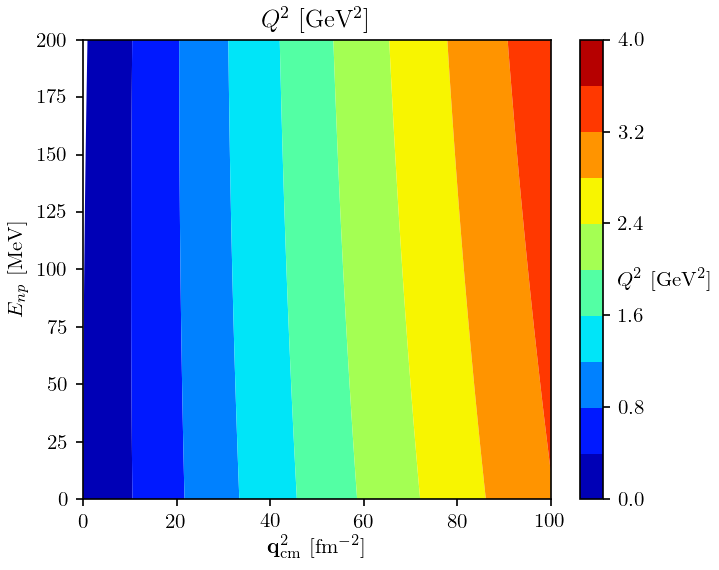

In [28]:
fig, ax = plt.subplots(figsize=(5,4))

CS = ax.contourf(Y, X, Z1, levels=np.linspace(0, 4, 11), cmap='jet', 
                 antialiased=True)
ax.set_title(r'$Q^2$ [GeV$^2$]')
ax.set_xlabel(r'${\bf q}_{\rm cm}^2$ [fm$^{-2}$]')
ax.set_ylabel(r'$E_{np}$ [MeV]')
cb = fig.colorbar(CS, shrink=1, extend='neither')
cb.set_label(r'$Q^2$ [GeV$^2$]', rotation=0, labelpad=10)


fig.tight_layout()

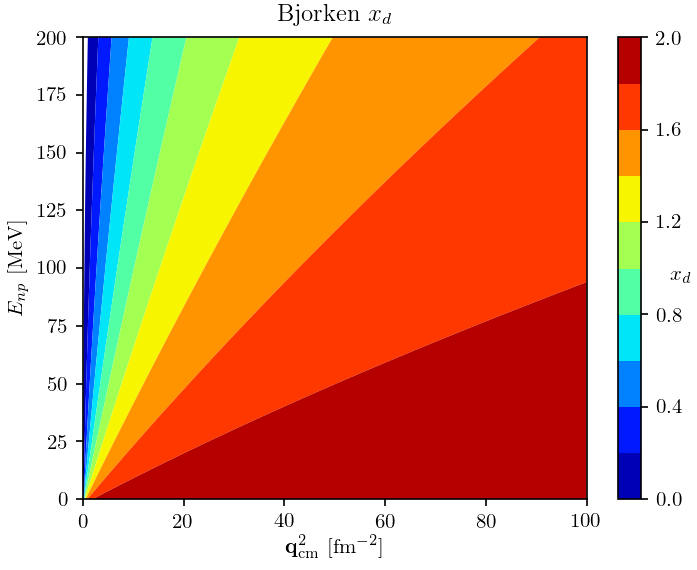

In [29]:
fig, ax = plt.subplots(figsize=(5,4))

CS = ax.contourf(Y, X, Z2, levels=np.linspace(0, 2, 11), cmap='jet', 
                 antialiased=True)
ax.set_title(r'Bjorken $x_d$')
ax.set_xlabel(r'${\bf q}_{\rm cm}^2$ [fm$^{-2}$]')
ax.set_ylabel(r'$E_{np}$ [MeV]')
cb = fig.colorbar(CS, shrink=1, extend='neither')
cb.set_label(r'$x_d$', rotation=0, labelpad=-1)

fig.tight_layout()